In [1]:
from tensorflow import keras
from keras import layers
from keras.datasets import fashion_mnist
from keras.regularizers import l2
from keras.callbacks import EarlyStopping

import tensorflow as tf
# Bibliothek für grafische Darstellung laden
import matplotlib.pyplot as plt
from PIL import Image #Image library Pillow
# Funktion für zufällige Bildauswahl laden
from random import randint
import seaborn as sns
import os
import numpy as np
import json 
import pandas as pd

In [2]:
# check if tensorflow is running on gpu
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Default GPU Device: /device:GPU:0


In [3]:
# Datensätze laden
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
labels = ["T-shirt/Top", "Hose", "Pullover", "Kleid", "Mantel", "Sandalen", "Hemd", "Sneaker", "Tasche", "Halbschuhe"]

trainingsdaten:
60000
[[  0   0   0   0   0   1   0   0   0   0  41 188 103  54  48  43  87 168
  133  16   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0  49 136 219 216 228 236 255 255 255 255 217
  215 254 231 160  45   0   0   0   0   0]
 [  0   0   0   0   0  14 176 222 224 212 203 198 196 200 215 204 202 201
  201 201 209 218 224 164   0   0   0   0]
 [  0   0   0   0   0 188 219 200 198 202 198 199 199 201 196 198 198 200
  200 200 200 201 200 225  41   0   0   0]
 [  0   0   0   0  51 219 199 203 203 212 238 248 250 245 249 246 247 252
  248 235 207 203 203 222 140   0   0   0]
 [  0   0   0   0 116 226 206 204 207 204 101  75  47  73  48  50  45  51
   63 113 222 202 206 220 224   0   0   0]
 [  0   0   0   0 200 222 209 203 215 200   0  70  98   0 103  59  68  71
   49   0 219 206 214 210 250  38   0   0]
 [  0   0   0   0 247 218 212 210 215 214   0 254 243 139 255 174 251 255
  205   0 215 217 214 208 220  95   0   0]
 [  0   0   0  45 226 214 214 215 224 205 

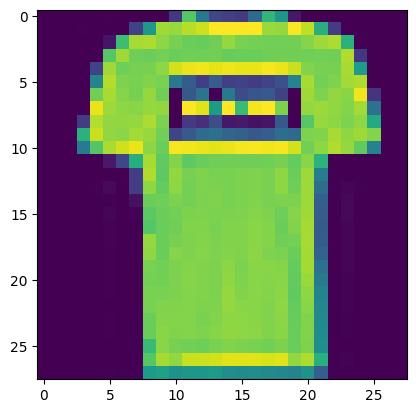

In [5]:
#Kennenlernen er Datensätze
print ("trainingsdaten:")
print (len(train_images))
print(train_images[1])
img_no = 1
# Bild zeigen
plt.figure()
print(train_labels[img_no])
plt.imshow(train_images[img_no])
plt.grid(False)
plt.show()

In [6]:
path = "./data/images" 
if not os.path.isdir(path):
    os.makedirs(path)

In [7]:
%%script false --no-raise-error

for i in range(0,100):
    im = Image.fromarray(train_images[i])
    real = train_labels[i]
    im.save(path + "/%d_%d.png" % (i, real))


Couldn't find program: 'false'


In [8]:
%%script false --no-raise-error

i = Image.open(path + "/0/1.png")
print(np.array(i))

Couldn't find program: 'false'


In [9]:
%%script false --no-raise-error

for i in range(len(train_images)):
    im = Image.fromarray(train_images[i])
    label = train_labels[i]
    if not os.path.isdir(path+ "/%s" % label):
        os.makedirs(path + "/%s" % label)
    im.save(path + "/%s/%d.png" % (label, i))


Couldn't find program: 'false'


In [10]:
train_images = train_images.astype("float32") / 255
print(train_images.shape, "train samples")
test_images = test_images.astype("float32") / 255

(60000, 28, 28) train samples


In [11]:
train_images = np.expand_dims(train_images, -1)
test_images = np.expand_dims(test_images, -1)
print(train_images.shape)

(60000, 28, 28, 1)


In [12]:
num_classes = 10

# convert class vectors (the labels) to binary class matrices
train_labels = keras.utils.to_categorical(train_labels, num_classes)
test_labels_untouched = test_labels #use this to leave the labels untouched
test_labels = keras.utils.to_categorical(test_labels, num_classes)

In [13]:
%%script false --no-raise-error
train_images = train_images.reshape(60000, 784)
test_images = test_images.reshape(10000, 784)
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

print(train_images)

Couldn't find program: 'false'


In [24]:
model = keras.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.SpatialDropout2D(0.3))

model.add(layers.Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.3))

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


In [15]:
%%script false --no-raise-error

class PrettySmartModel(keras.Model):
  def __init__(self, input_shape, hidden_units, output_shape):
    super().__init__()
    self.conv1 = Conv2D(hidden_units, (3,3), padding="same", input_shape=(input_shape, input_shape, 1))
    self.relu1 = ReLU()
    self.conv2 = Conv2D(hidden_units, (3,3), padding="same")
    self.relu2 = ReLU()
    self.pool1 = MaxPooling2D((2,2))
    
    self.conv3 = Conv2D(hidden_units, (3,3), padding="same")
    self.relu3 = ReLU()
    self.conv4 = Conv2D(hidden_units, (3,3), padding="same")
    self.relu4 = ReLU()
    self.pool2 = MaxPooling2D((2,2))
    
    self.flatten = Flatten()
    self.fc = Dense(output_shape, input_shape=(hidden_units * 7 * 7,))
  
  def call(self, x):
    x = self.conv1(x)
    x = self.relu1(x)
    x = self.conv2(x)
    x = self.relu2(x)
    x = self.pool1(x)
    
    x = self.conv3(x)
    x = self.relu3(x)
    x = self.conv4(x)
    x = self.relu4(x)
    x = self.pool2(x)
    
    x = self.flatten(x)
    x = self.fc(x)
    return x

Couldn't find program: 'false'


In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 spatial_dropout2d_1 (Spatia  (None, 5, 5, 64)         0         
 lDropout2D)                                                     
                                                      

In [26]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [27]:
batch_size = 128
epochs = 50

#model = keras.models.load_model('./data/save/model.mdl')
#model.load_weights("./data/save/model.h5")


early_stopping = EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs, validation_split=0.1, callbacks=[early_stopping])

Epoch 1/50
422/422 [==============================] - 10s 10ms/step - loss: 0.6217 - accuracy: 0.7725 - val_loss: 0.4049 - val_accuracy: 0.8548
Epoch 2/50
422/422 [==============================] - 4s 9ms/step - loss: 0.4159 - accuracy: 0.8506 - val_loss: 0.3403 - val_accuracy: 0.8777
Epoch 3/50
422/422 [==============================] - 4s 9ms/step - loss: 0.3618 - accuracy: 0.8706 - val_loss: 0.3067 - val_accuracy: 0.8898
Epoch 4/50
422/422 [==============================] - 4s 9ms/step - loss: 0.3296 - accuracy: 0.8795 - val_loss: 0.2935 - val_accuracy: 0.8940
Epoch 5/50
422/422 [==============================] - 4s 8ms/step - loss: 0.3106 - accuracy: 0.8864 - val_loss: 0.2818 - val_accuracy: 0.8957
Epoch 6/50
422/422 [==============================] - 4s 9ms/step - loss: 0.2907 - accuracy: 0.8917 - val_loss: 0.2691 - val_accuracy: 0.8990
Epoch 7/50
422/422 [==============================] - 4s 9ms/step - loss: 0.2774 - accuracy: 0.8993 - val_loss: 0.2603 - val_accuracy: 0.9047
Epoc

Text(0, 0.5, 'Accuracy [%]')

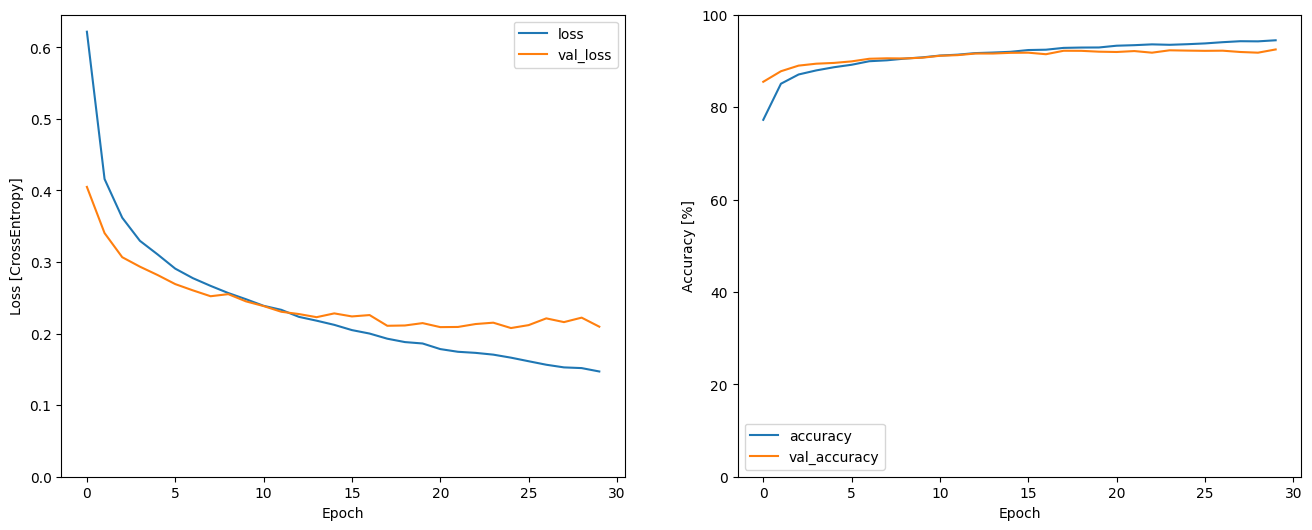

In [28]:
metrics = history.history
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.plot(history.epoch, metrics['loss'], metrics['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.ylim([0, max(plt.ylim())])
plt.xlabel('Epoch')
plt.ylabel('Loss [CrossEntropy]')

plt.subplot(1,2,2)
plt.plot(history.epoch, 100*np.array(metrics['accuracy']), 100*np.array(metrics['val_accuracy']))
plt.legend(['accuracy', 'val_accuracy'])
plt.ylim([0, 100])
plt.xlabel('Epoch')
plt.ylabel('Accuracy [%]')

In [29]:
score = model.evaluate(test_images, test_labels, verbose=2)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

313/313 - 1s - loss: 0.2302 - accuracy: 0.9199 - 1s/epoch - 4ms/step
Test loss: 0.230161651968956
Test accuracy: 0.9199000000953674


In [30]:
pred = model.predict(test_images)
print(pred[1]) #Prediction for image 1
pred_1 = np.argmax(pred[1])
print(labels[pred_1], pred_1)
print(labels[test_labels_untouched[1]])

313/313 [==============================] - 1s 4ms/step
[3.5873070e-06 1.3774144e-14 9.9997139e-01 1.0131896e-06 6.2680232e-07
 2.9693275e-14 2.3453496e-05 8.5106469e-14 5.9994321e-10 2.0325692e-12]
Pullover 2
Pullover


In [31]:
counter = 0
for i in range(0,10000):
    pred_i = np.argmax(pred[i]) # get the position of the highest value within the list
    if test_labels_untouched[i] != pred_i: 
        counter += 1
print("Fails: ", counter)

Fails:  801


In [ ]:
zahl = 1200   
print(test_labels_untouched[zahl])
print(labels[test_labels_untouched[zahl]])

plt.imshow(train_images[zahl])
plt.show()

In [ ]:
y_pred = model.predict(test_images)

313/313 [==============================] - 1s 4ms/step


In [ ]:
y_pred = tf.argmax(y_pred, axis=1)

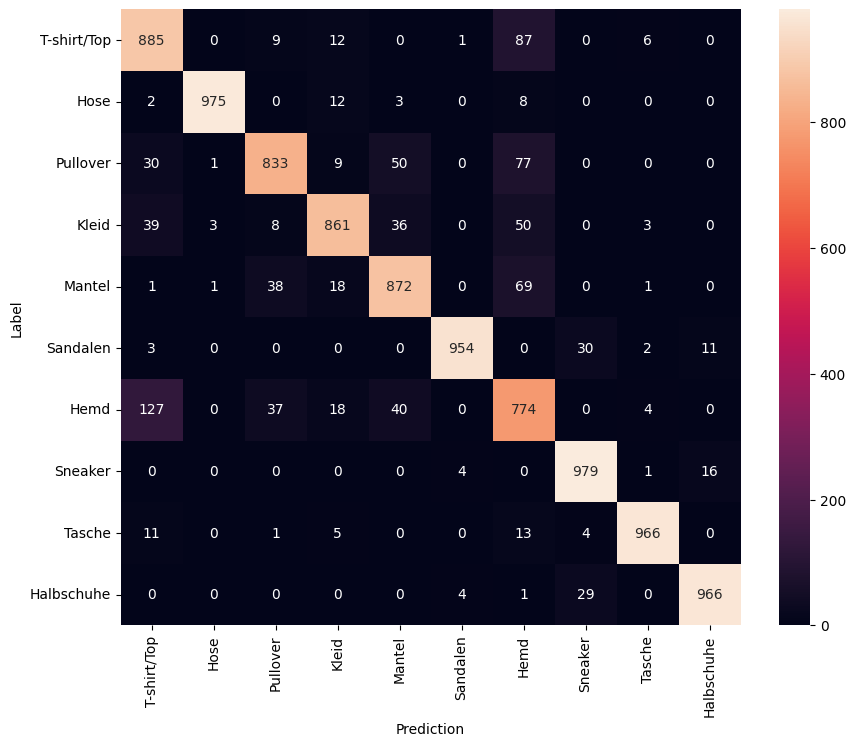

In [ ]:
confusion_mtx = tf.math.confusion_matrix(test_labels_untouched, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx,
            xticklabels=labels,
            yticklabels=labels,
            annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

In [ ]:
model.save('./data/save/model.mdl')
model.save_weights("./data/save/model.h5")

In [ ]:
weights = model.get_weights()
j =json.dumps(pd.Series(weights).to_json(orient='values'), indent=3)
print(j)

"""
model = keras.models.load_model('/home/albert/model.mdl')
model.load_weights("/home/albert/model.h5")
"""

model_json = model.to_json()
print (model_json)
